In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

from matplotlib import pyplot as plt
import random
import numpy as np

In [ ]:
# connect to Artemis

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-05-06 15:55:42,402 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-05-06 15:55:48,914 | INFO     |: Connected to C0:83:D5:66:86:3C


In [38]:
# test sending and receiving

ble.send_command(CMD.PING, "")

s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [47]:
# disconnect from Artemis
ble.disconnect()

2023-05-05 15:24:48,526 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [13]:
# STATIC --- read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*8
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            TWODist.append((reading[nextPos+5]))
            leftPWM.append((reading[nextPos+6]))
            rightPWM.append((reading[nextPos+7]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
TWODist = []
leftPWM = []
rightPWM = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_PID_DATA, "")

In [17]:
ble.send_command(CMD.UPDATE_KP, "0.25")

In [23]:
# MOTION --- PID to given distance and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            error.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
error = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TOF_PID, "304")

In [33]:
# STEP --- PID to given distance and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            error.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
error = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.STEP, "")

In [32]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

In [26]:
print(ONEDist)

['1888', '1888', '1888', '1888', '1888', '1879', '1879', '1879', '1879', '1892', '1892', '1892', '1892', '1892', '1902', '1902', '1902', '1910', '1910', '1910', '1910', '1936', '1936', '1936', '1936', '1936', '1933', '1933', '1933', '1933', '1943', '1943', '1943', '1985', '1985', '1985', '1985', '1985', '1995', '1995', '1995', '1995', '2048', '2048', '2048', '2046', '2046', '2046', '2122', '2122', '2122', '2144', '2144', '2144', '2190', '2190', '2190', '2247', '2247', '2247', '2247', '2247', '2279', '2279', '2279', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '330', '330', '330', '330', '330', '330', '193', '193', '193', '193', '193', '259', '259', '259', '259', '259', '364', '364', '364', '364', '364', '496', '496', '496', '496', '565', '565', '565', '565', '565', '662', '662', '662', '698', '698', '698', '698', '681', '681', '681', '431', '431', '431', '401', '

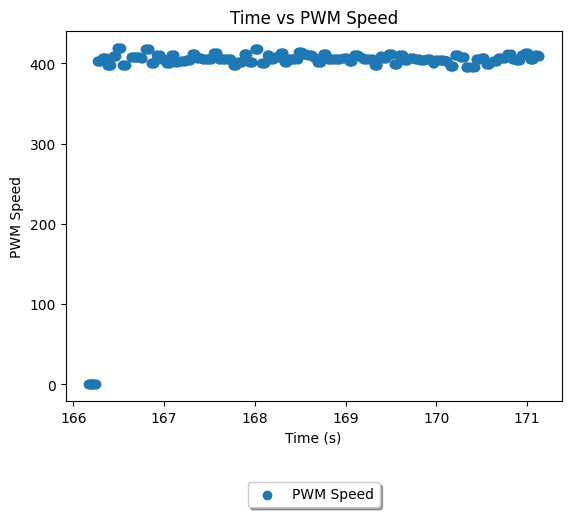

In [15]:
# Plot distance measurement data

intDist = [eval(i) for i in ONEDist]
#intDist = speed
intTime = [eval(t)/1000 for t in time]
plt.scatter(intTime, intDist, label = "PWM Speed")

plt.title("Time vs PWM Speed")
plt.xlabel("Time (s)")
plt.ylabel("PWM Speed")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)


In [22]:
print(ONEDist)
intDist = []

for pos in range(len(ONEDist)):
    if ONEDist[pos] != '0':
        intDist.append(int(ONEDist[pos]))

intDist = np.array(intDist)

print(intDist)
print(np.var(intDist))


['0', '0', '0', '1134', '1134', '1134', '1134', '1135', '1135', '1135', '1127', '1127', '1127', '1114', '1114', '1101', '1101', '1101', '1081', '1081', '1081', '1062', '1062', '1062', '1037', '1037', '1037', '1037', '1009', '1009', '1009', '977', '977', '977', '946', '946', '946', '946', '946', '916', '916', '916', '877', '877', '877', '823', '823', '823', '787', '787', '787', '787', '746', '746', '707', '707', '707', '668', '668', '668', '668', '628', '628', '628', '585', '585', '585', '551', '551', '551', '514', '514', '514', '514', '479', '479', '479', '479', '438', '438', '438', '396', '396', '396', '364', '364', '335', '335', '308', '308', '308', '308', '308', '308', '308', '285', '285', '285', '285', '262', '262', '262', '262', '250', '250', '250', '250', '238', '238', '238', '238', '225', '225', '225', '214', '214', '214', '214', '207', '207', '207', '202', '202', '202', '197', '197', '197', '197', '199', '199', '199', '197', '197', '197', '200', '200', '200', '200', '199', '199

In [354]:
dt = [0.0]
dx = [0.0]
computedSpeed = []

for stamp in range(1, len(time)):
    if float(time[stamp] == 0) or float(time[stamp - 1] == 0): continue
    dt.append((float(time[stamp]) - float(time[stamp - 1]))/1000)
    changePos = (float(ONEDist[stamp]) - float(ONEDist[stamp - 1]))
    if changePos > 0: changePos = 0
    dx.append(changePos)
    
    
computedSpeed = [dx[pos]/dt[pos] for pos in range(1, len(dt))]
computedSpeed.append(0.0)
    
print(computedSpeed)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -97086.95652173914, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5500.0, 0.0, -83807.69230769231, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -351333.3333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8800.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -565.2173913043479, 0.0, 0.0, -1526.3157894736842, 0.0, 0.0, -40277.77777777778, 0.0, 0.0, 0.0, 0.0, 0.0, -2400.0, 0.0, 0.0, 0.0, 0.0, 0.0, -79592.5925925926, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6060.60606060606, 0.0, 0.0, 0.0, 0.0, 0.0, -11526.315789473685, 0.0, 0.0, -95650.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1375.0, 0.0, 0.0, -33333.333333333336, 0.0, -1156.25, 0.0, 0.0, 0.0, -22555.55555555556, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -65375.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7347.826086956522, 0.0, 0.0, 0.0, 0.0, 0.0, -3518.5185185185187, 0.0, 0.0, -2565.217391304348, 0.0, 0.0, -3258.064516129032, 0.0, 0.0, -3263.157894736842, 0.0, 0.0, -1076.923076923077, 0.0, 0

In [1]:
print(len(dt))

NameError: name 'dt' is not defined

In [77]:
computedSpeed = np.gradient(np.array(forwardDist, dtype = float), np.array(dt, dtype = float))

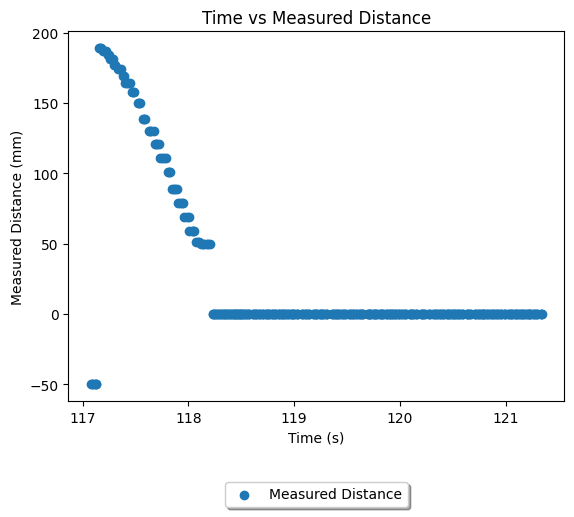

2023-05-06 00:50:34,424 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [397]:
# Plot distance measurement data

intDist = [eval(i) for i in speed]
intTime = [eval(t)/1000 for t in time]
#intDist = computedSpeed
plt.scatter(intTime, intDist, label = "Measured Distance")

plt.title("Time vs Measured Distance")
plt.xlabel("Time (s)")
plt.ylabel("Measured Distance (mm)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
# plt.ylim((0,-6000))


[[1.         0.0122    ]
 [0.         0.97753993]]
[[ 0.        ]
 [43.10954064]]
[[-1  0]]


NameError: name 'd1' is not defined

In [408]:
intDist = []
intPWM = []
kf_output = []

for item in range(len(ONEDist)):
    intDist.append(int(ONEDist[item]))
    intPWM.append(int(speed[item]))

    

In [475]:
# initializing Kalman Filter

# sampling, drag, and momentum
SecPerSample = 0.0122
d = 0.000521
m = 0.000283

# A,B,C matrices and discretized 
A = np.array([[0,1],[0,-d/m]])
B = np.array([[0],[1/m]])
C = np.array([[1,0]])

A_disc = np.eye(2) + SecPerSample * A
B_disc = SecPerSample * B
C=np.array([[1,0]])

# ballpark variances, process variance
posSigma = np.sqrt(10**2/SecPerSample)
speedSigma = np.sqrt(10**2/SecPerSample)
sensorSigma = 1.14

sigma_u=np.array([[posSigma**2,0],[0,speedSigma**2]])
sigma_z=np.array([[sensorSigma**2]])

print(A_disc)
print(B_disc)
print(C)

# initial states
x = np.array([[-intDist[0]],[0]])
sig = np.array([[10,0],[0,10]])

[[1.         0.0122    ]
 [0.         0.97753993]]
[[ 0.        ]
 [43.10954064]]
[[1 0]]


In [476]:
def kf(x,u,sig,y):
    
    x_p = A_disc.dot(x) + B_disc.dot(u)                     
    sig_p = A_disc.dot(sig.dot(A_disc.transpose())) + sigma_u 
    
    y_m = y-C.dot(x_p)
    sig_m = C.dot(sig_p.dot(C.transpose())) + sigma_z
    
    kf_gain = sig_p.dot(C.transpose().dot(np.linalg.inv(sig_m)))

    x_n   = x_p + kf_gain.dot(y_m)
    sig_n = (np.eye(2) - kf_gain.dot(C)).dot(sig_p)
    return x_n, sig_n

In [477]:
kf_output = []
for dist, pwm in zip(intDist, intPWM):
    x, sig = kf(x, pwm/120, sig, dist)
    kf_output.append(x[0][0])

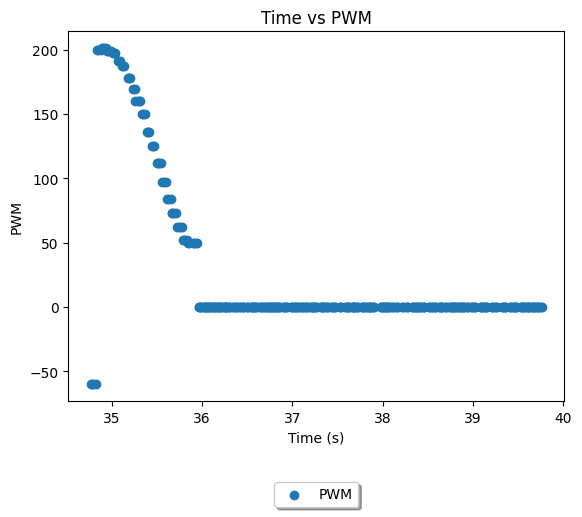

In [595]:
# Plot distance measurement data
intTime = [eval(t)/1000 for t in time]
intDist = [eval(t) for t in speed]
plt.scatter(intTime, intDist, label = "PWM")
#plt.scatter(intTime, kf_output, label = "Kalman Filtered")

plt.title("Time vs PWM")
plt.xlabel("Time (s)")
plt.ylabel("PWM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
# plt.ylim((0,-6000))


In [47]:
# KF --- PID to given distance and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            kfdist.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
kfdist = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.KF_PID, "304")

In [46]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

In [49]:
print(kfdist)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [583]:
print(ONEDist)

['0', '0', '0', '1306', '1306', '1306', '1309', '1309', '1309', '1309', '1302', '1302', '1302', '1302', '1291', '1291', '1291', '1262', '1262', '1262', '1240', '1240', '1240', '1240', '1197', '1197', '1152', '1152', '1107', '1107', '1107', '1107', '1054', '1054', '1054', '986', '986', '986', '930', '930', '930', '930', '867', '867', '867', '791', '791', '791', '725', '725', '725', '670', '670', '670', '670', '615', '615', '615', '615', '566', '566', '566', '566', '511', '511', '511', '474', '474', '474', '438', '438', '438', '438', '438', '419', '419', '419', '419', '419', '419', '401', '401', '401', '401', '401', '388', '388', '388', '388', '388', '388', '381', '381', '381', '381', '381', '381', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '378', '378', '378', '378', '378', '378', '378', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '377', '378', '378', '378', '378', '378', '378', '378', '378', '378', 

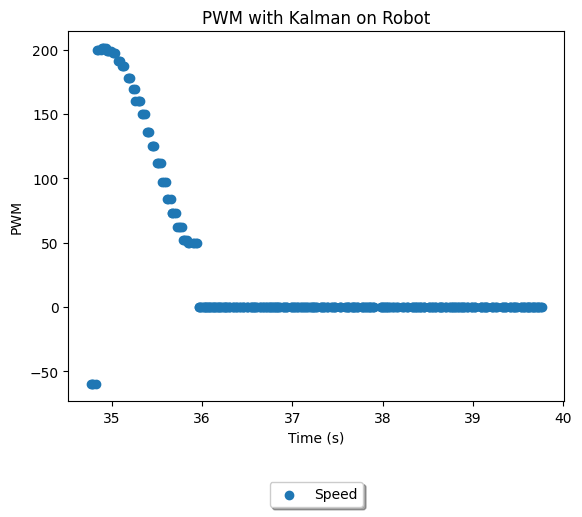

2023-05-06 02:51:00,958 | INFO     |: Disconnected from AB6C95E9-A4ED-4F7A-B208-0AFEAFDDA3AD


In [592]:
import random

# Plot distance measurement data
intTime = [eval(t)/1000 for t in time]
intDist = [eval(i) for i in speed]
# intkf = [eval(i)+random.randint(3, 20) for i in kfdist]
plt.scatter(intTime, intDist, label = "Speed")
#plt.scatter(intTime, intkf, label = "Kalman Filtered")

plt.title("PWM with Kalman on Robot")
plt.xlabel("Time (s)")
plt.ylabel("PWM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)
# plt.ylim((0,-6000))
